# instagram Reach Ansalysis

In [228]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor


In [230]:
i_data=pd.read_csv(r"D:\dataset\Instagram data.csv",encoding='latin1')
i_data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [232]:
i_data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [234]:
i_data.dropna()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [236]:
i_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_3968\4184280392.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




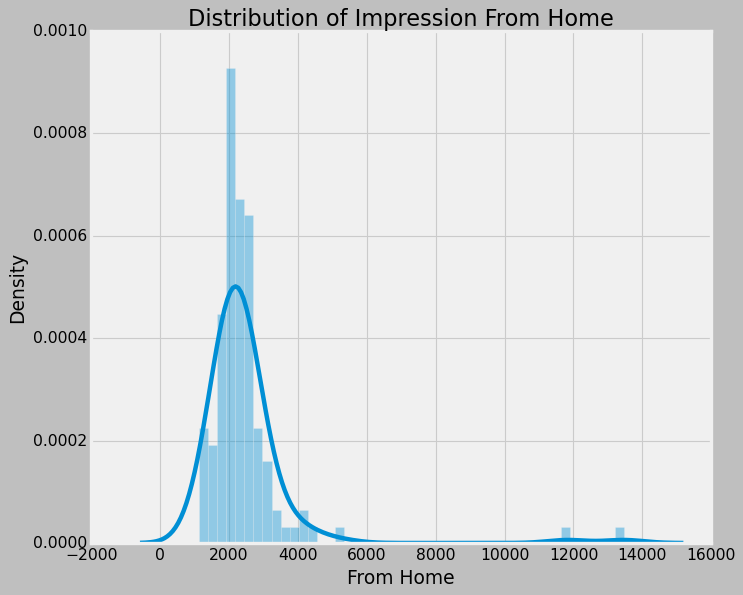

In [238]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impression From Home")
sns.distplot(i_data['From Home'])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3968\1984219088.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




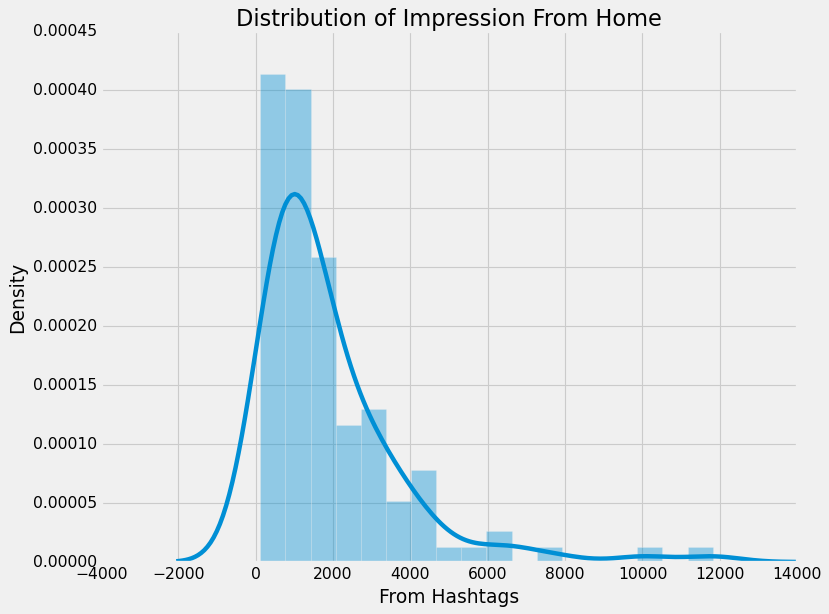

In [240]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impression From Home")
sns.distplot(i_data['From Hashtags'])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3968\462271475.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




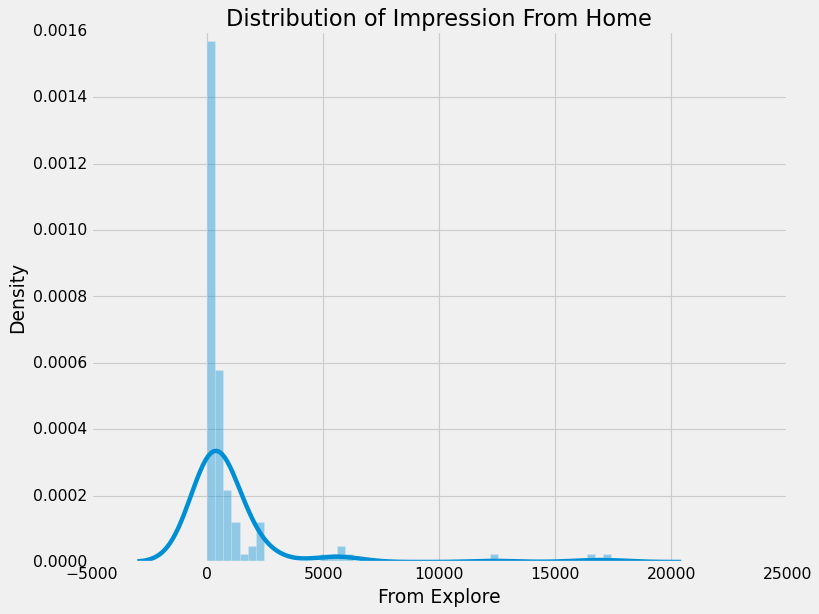

In [242]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impression From Home")
sns.distplot(i_data['From Explore'])
plt.show()

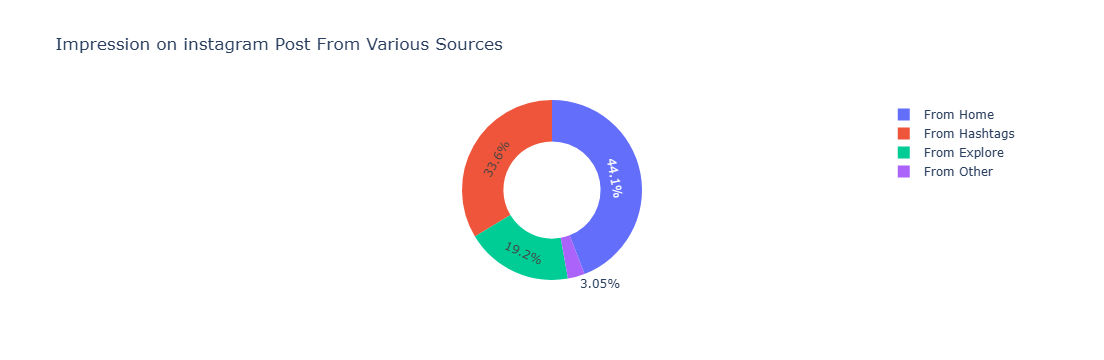

In [244]:
home=i_data["From Home"].sum()
hashtags=i_data["From Hashtags"].sum()
explor=i_data["From Explore"].sum()
other=i_data["From Other"].sum()

lable=['From Home','From Hashtags','From Explore','From Other']
value=[home,hashtags,explor,other]

fig=px.pie(i_data,values=value,names=lable,title='Impression on instagram Post From Various Sources',hole=0.54)
fig.show()

In [246]:
i_data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

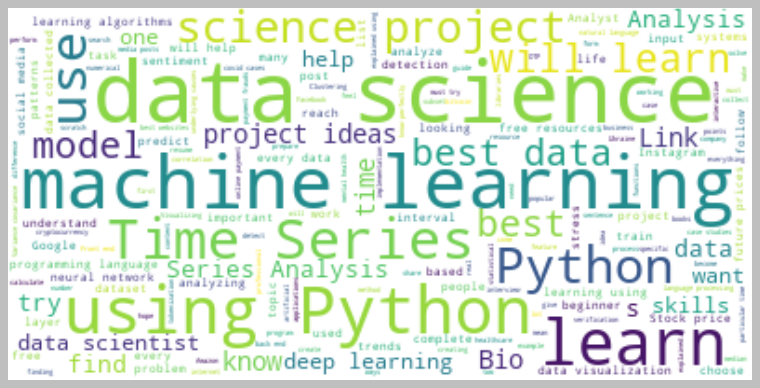

In [248]:
text=" ".join(i for i in i_data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

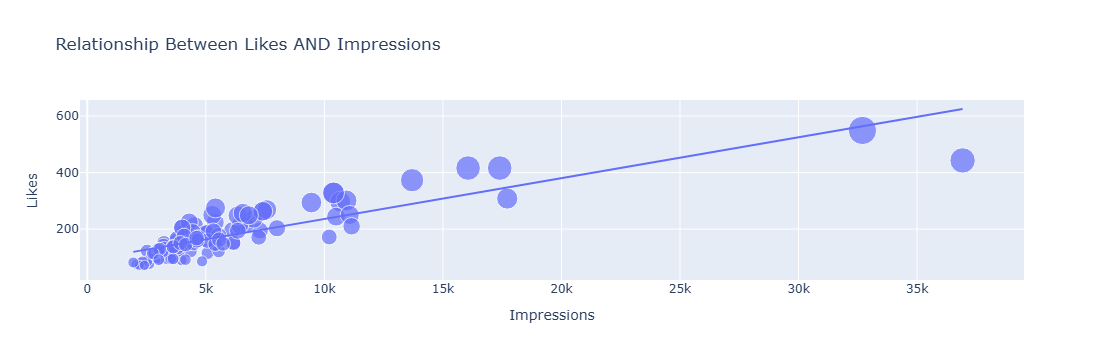

In [249]:
figure=px.scatter(data_frame=i_data,x="Impressions",
                  y="Likes", size="Likes",trendline="ols",
            title ="Relationship Between Likes AND Impressions")
figure.show()

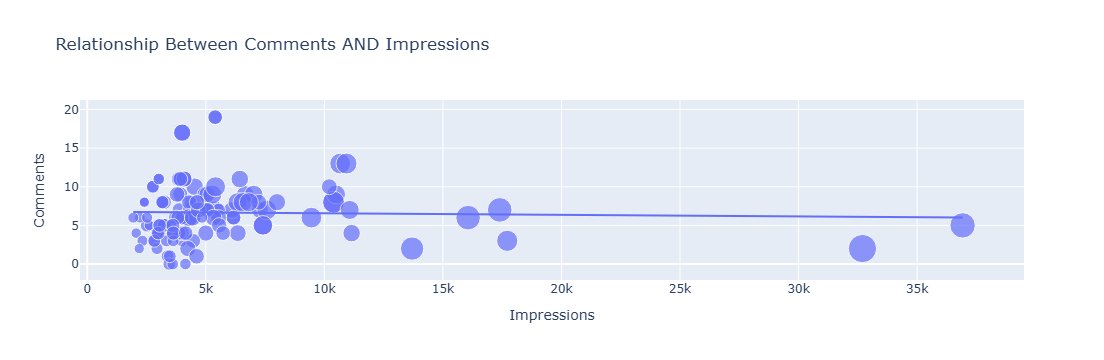

In [251]:
figure=px.scatter(data_frame=i_data,x="Impressions",
                  y="Comments", size="Likes",trendline="ols",
            title ="Relationship Between Comments AND Impressions")
figure.show()

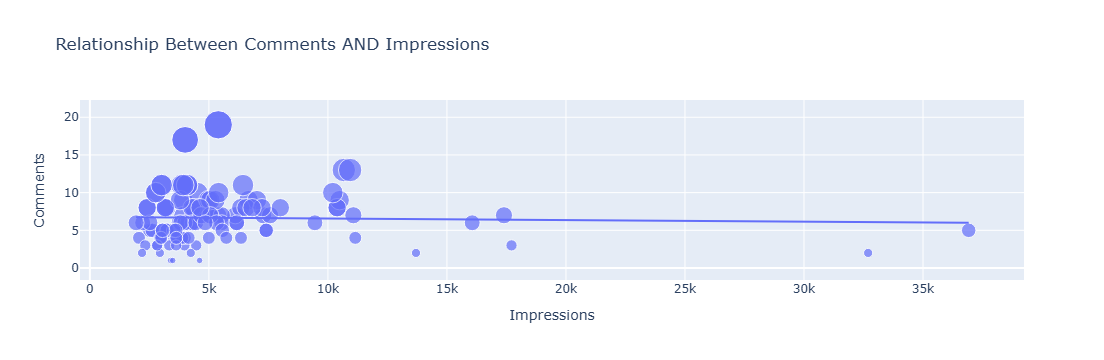

In [254]:
figure=px.scatter(data_frame=i_data,x="Impressions",
                  y="Comments", size="Comments",trendline="ols",
            title ="Relationship Between Comments AND Impressions")
figure.show()

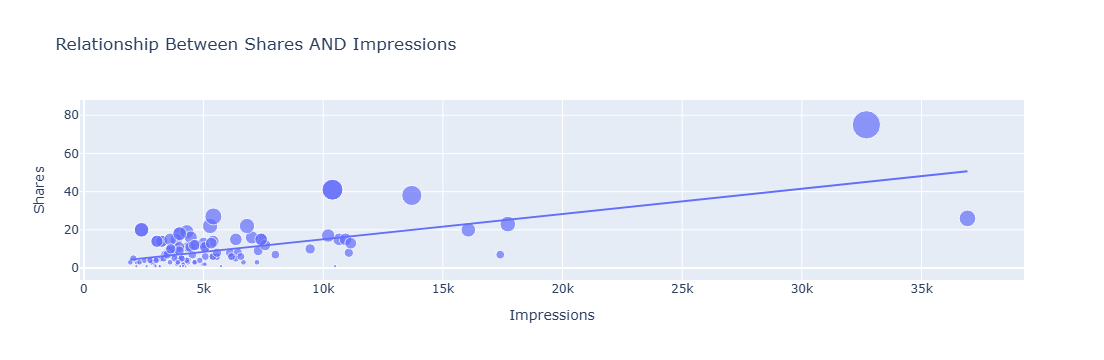

In [256]:
figure=px.scatter(data_frame=i_data,x="Impressions",
                  y="Shares", size="Shares",trendline="ols",
            title ="Relationship Between Shares AND Impressions")
figure.show()

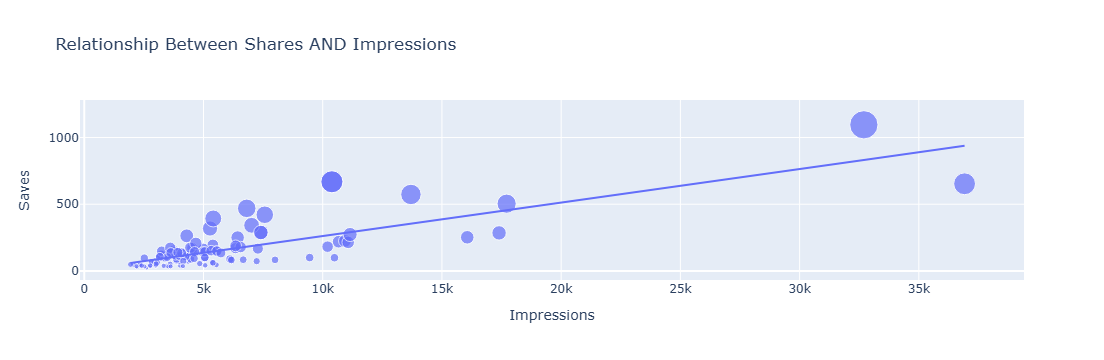

In [258]:
figure=px.scatter(data_frame=i_data,x="Impressions",
                  y="Saves", size="Saves",trendline="ols",
            title ="Relationship Between Shares AND Impressions")
figure.show()

In [260]:
correlation = i_data.iloc[:, 0:11].corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [262]:
conversion_rate=(i_data["Follows"].sum()/i_data["Profile Visits"].sum())*100
print(conversion_rate)

41.00265604249668


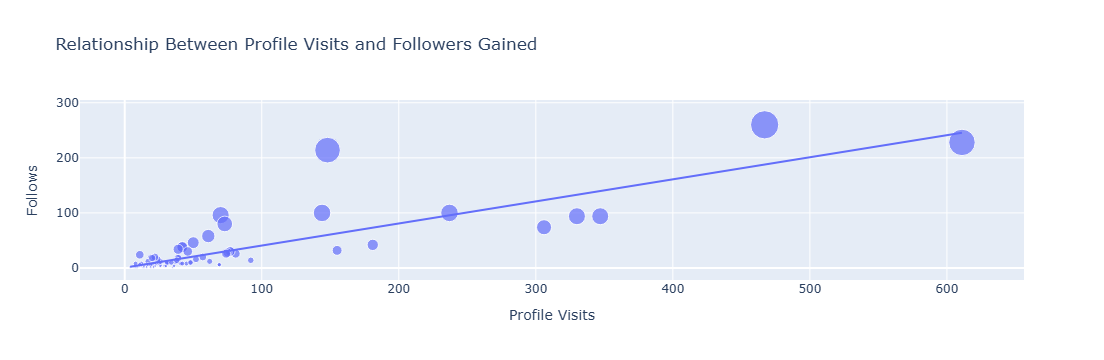

In [264]:
# Scatterplot 

figure=px.scatter(data_frame=i_data,x="Profile Visits",y="Follows",size="Follows",trendline="ols",title ="Relationship Between Profile Visits and Followers Gained")

figure.show()
 

In [266]:
i_data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [268]:
x=np.array(i_data[['Likes','Saves','Comments','Shares','Profile Visits','Follows']])
y=np.array(i_data["Impressions"])
xtrain,xtest ,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)